In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
#from dash import Dash, html, dcc, Input, Output, State, ctx
#import dash_bio as dashbio

import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import sqlite3
# Set Helvetica font globally
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']

# Optional: make sure fonts are updated
mpl.rcParams['pdf.fonttype'] = 42  # Avoids Type 3 fonts in PDF output
mpl.rcParams['ps.fonttype'] = 42

In [45]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#0f4c5c", "#ecf39e", "#9a031e"]
custom_cmap = LinearSegmentedColormap.from_list("black_blue_gold", colors)


def get_text_color(rgb, threshold=0.5):
    r, g, b = rgb[:3]  # RGB tuple between 0 and 1
    luminance = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return 'white' if luminance < threshold else 'black'


# Generate N evenly spaced colors from the viridis colormap
N = 100
viridis = plt.get_cmap('cividis', N)
viridis_colors = [mcolors.to_hex(viridis(i)) for i in range(N)]

# Use first and last for range:
color_range = [viridis_colors[-1], viridis_colors[0]]

In [46]:
# RNA structure definitions
fourU_WT = {
    'sequence': 'GTTGAACTTTTGAATAGTGATTCAGGAGGTTAAT',
    'structure': '(((((.(((((((((....))))))))).)))))',
    'structure_name': 'fourU_WT',
    'options': {'name': 'fourU_WT'}
}

In [47]:
dG_data = pd.read_csv('../../08_dG_barplots/4U_energy_with18A.csv')

dG_data[dG_data['disp_name'] == '4U_wt']

,Unnamed: 0,site,disp_name,base,site_nt,dG,dG_err
0,0,7,4U_wt,A,7A,1.086420,4.210261
1,1,8,4U_wt,A,8A,1.073381,4.223077
2,2,15,4U_wt,A,15A,1.784226,3.816190
3,3,16,4U_wt,A,16A,1.969192,3.769920
4,4,22,4U_wt,A,22A,1.427904,3.959903
5,5,26,4U_wt,A,26A,2.104654,3.744148
6,6,29,4U_wt,A,29A,2.133948,3.739213
7,7,34,4U_wt,A,34A,1.796252,3.813158
8,8,35,4U_wt,A,35A,1.661955,3.856085
17,17,9,4U_wt,C,9C,2.059765,2.566662


In [48]:
df_WT = pd.read_csv('output_csvs/fourU_WT.csv')
df_A8C = pd.read_csv('output_csvs/fourU_A8C.csv')

dG_data = pd.read_csv('../..//08_dG_barplots/4U_energy_with18A.csv')
dG_wt = dG_data[dG_data['disp_name'] == '4U_wt']
dG_A8C = dG_data[dG_data['disp_name'] == '4U_a8c']

df_WT['site'] = df_WT.index + 1
df_WT = df_WT.merge(dG_wt[['site', 'dG']], on='site', how='left')
# fill 0 for missing dG values
df_WT['dG'] = df_WT['dG'].fillna(-999)

df_A8C['site'] = df_A8C.index + 1
df_A8C = df_A8C.merge(dG_A8C[['site', 'dG']], on='site', how='left')
# fill 0 for missing dG values
df_A8C['dG'] = df_A8C['dG'].fillna(-999)

import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_structure_data(df_toplot, figsize, out_file = ''):
    fig, ax = plt.subplots(figsize=figsize)

    for i, row in df_toplot.iterrows():
        x, y = row['x'], row['y']
        base = row['nt']
        dG = row['dG']
        
        if dG == -999:
            facecolor = 'white'
            edgecolor = 'black'
            textcolor = 'black'
        else:
            # Optional: use a colormap for continuous dG coloring
            # Here we map dG from blue (stable) to red (unstable)

            norm = mcolors.Normalize(vmin=-2,
                                        vmax=4)
            cmap = plt.get_cmap('magma_r')
            cmap = custom_cmap
            sm = cm.ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])
            facecolor = cmap(norm(dG))
            edgecolor = None
            textcolor = get_text_color(facecolor)

        ax.scatter(x, y, s=300, facecolors=facecolor, edgecolors=edgecolor, linewidths=1)
        ax.annotate(f"{base}", (x, y), fontsize=12, ha='center', va='center', color=textcolor, fontweight='bold')

    ax.axis('equal')
    ax.grid(False)
    ax.axis('off')

    fig.colorbar(sm, ax=ax, orientation='vertical', label='ΔG (kcal/mol)')
    plt.savefig(out_file, bbox_inches='tight')
    plt.show()

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


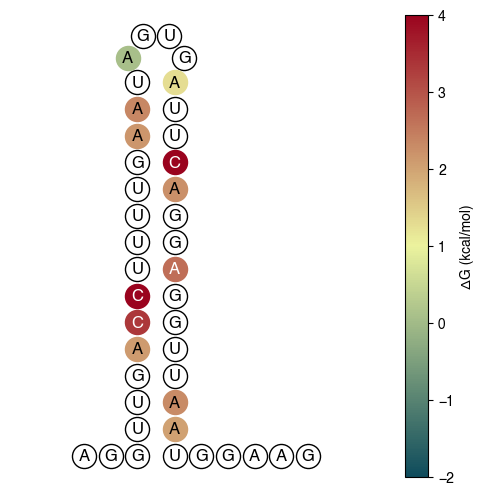

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


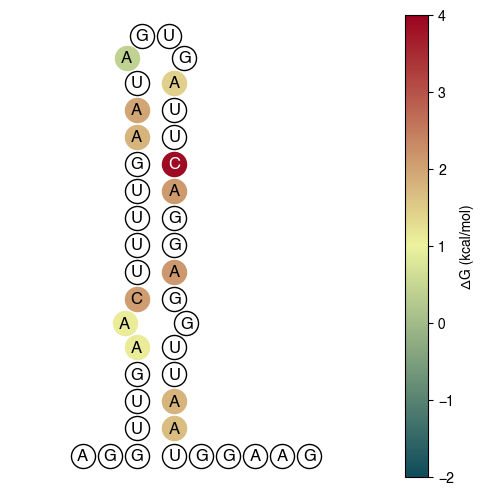

In [49]:
plot_structure_data(df_A8C, (6,6), 'fourU_A8C.pdf')
plot_structure_data(df_WT, (6,6), 'fourU_WT.pdf')

In [50]:
hiv_WT = pd.read_csv('output_csvs/hiv_WT.csv').reset_index()
hiv_A35G = pd.read_csv('output_csvs/hiv_A35G.csv').reset_index()

dG_data = pd.read_csv('../../08_dG_barplots/hiv_calc_dG.csv')
dG_wt = dG_data[dG_data['disp_name'] == 'hiv_wt']
dG_A35G = dG_data[dG_data['disp_name'] == 'hiv_a35g']

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


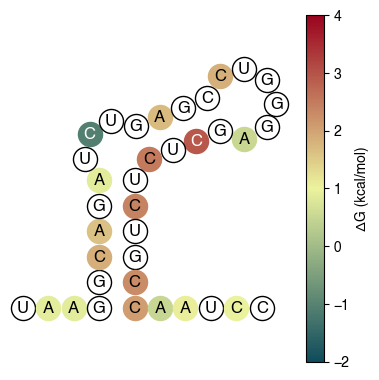

In [51]:
dict_site = {
    1: 2,
    2: 3,
    5: 19,
    6: 20,
    7: 21,
    8: 22,
    9: 23,
    10: 24,
    11: 25,
    12: 26,
    13: 27,
    14: 28,
    15: 29,
    16: 30, 
    17: 31, 
    18: 32,
    19: 33,
    20: 34,
    21: 35,
    22: 36,
    23: 37,
    24: 38,
    25: 39,
    26: 40,
    27: 41,
    28: 42,
    29: 43,
    30: 44,
    31: 45,
    32: 61,
    33: 62,
    34: 63,
    35: 64
}

# group by site dG_wt keep site and base
dG_wt_grouped = dG_wt.groupby(['site', 'base'])['dG'].mean()  
dG_wt_grouped = dG_wt_grouped.reset_index()
dG_wt_grouped['site'] = dG_wt_grouped['site'].astype(int)
dG_wt_grouped['base'] = dG_wt_grouped['base'].astype(str)


hiv_WT['site'] = hiv_WT['index'].map(dict_site)
hiv_WT = hiv_WT.merge(dG_wt_grouped[['site', 'dG']], on = 'site', how='left')
# fill 0 for missing dG values
hiv_WT['dG'] = hiv_WT['dG'].fillna(-999)
hiv_WT['nt'] = hiv_WT['nt'].replace('T', 'U')

plot_structure_data(hiv_WT, (4.5, 4.5), 'hiv_WT.pdf')


In [52]:
hiv_es2 = pd.read_csv('output_csvs/hiv_UUCGES.csv')
hiv_es2 = hiv_es2.reset_index()
dG_data = pd.read_csv('../../08_dG_barplots/hiv_calc_dG.csv')
dG_es2 = dG_data[dG_data['disp_name'] == 'hiv_es2']

In [42]:
dict_site_es2 = {
    1: 2,
    2: 3,
    5: 19,
    6: 20,
    7: 21,
    8: 22,
    9: 23,
    10: 24,
    11: 25,
    12: 26,
    13: 27,
    14: 28,
    15: 29,
    16: 30, 
    17: 51, 
    18: 52,
    19: 53,
    20: 54,
    21: 34,
    22: 35,
    23: 36,
    24: 37,
    25: 38,
    26: 39,
    27: 40,
    28: 41,
    29: 42,
    30: 43,
    31: 44,
    32: 45,
    33: 61,
    34: 62,
    35: 63,
    36: 64
}

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


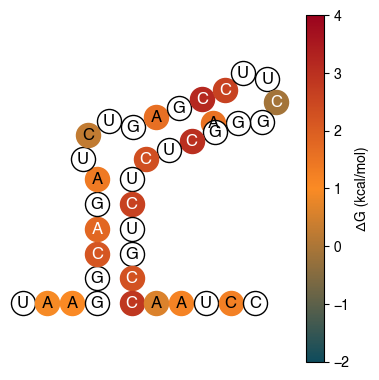

In [44]:

# group by site dG_ES2 keep site and base
dG_es2_grouped = dG_es2.groupby(['site', 'base'])['dG'].mean()  
dG_es2_grouped = dG_es2_grouped.reset_index()
dG_es2_grouped['site'] = dG_es2_grouped['site'].astype(int)
dG_es2_grouped['base'] = dG_es2_grouped['base'].astype(str)


hiv_es2['site'] = hiv_es2['index'].map(dict_site_es2)
hiv_es2 = hiv_es2.merge(dG_es2_grouped[['site', 'dG']], on = 'site', how='left')
# fill 0 for missing dG values
hiv_es2['dG'] = hiv_es2['dG'].fillna(-999)
hiv_es2['nt'] = hiv_es2['nt'].replace('T', 'U')

plot_structure_data(hiv_es2, (4.5, 4.5), 'hiv_es2.pdf')

In [ ]:
# preprocessing p4p6

import re
import pandas as pd

# Load the SVG content
with open("/Users/edricchoi/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/88_EKC_Probing_model/Manuscript/Data_elements/18_color_coded_structures/p4p6/naked_p4p6_labeled.svg", "r") as f:
    svg = f.read()

# Find all <circle ... />
circle_pattern = re.compile(r'<circle[^>]+?cx="([\d.]+)"\s+cy="([\d.]+)".*?/>')
circles = circle_pattern.findall(svg)

# Find all <text ...><tspan ...>LABEL</tspan></text>
text_pattern = re.compile(
    r'<text[^>]*?transform="translate\(([\d.]+)\s+([\d.]+)\)"><tspan[^>]*?>(.*?)</tspan></text>'
)
labels = text_pattern.findall(svg)

# Match circle to label by order
data = []
for (cx, cy), (tx, ty, label) in zip(circles, labels):
    data.append({
        "x": float(cx),
        "y": float(cy),
        "text_x": float(tx),
        "text_y": float(ty),
        "nt": label
    })

# Convert to DataFrame
df = pd.DataFrame(data)
df.to_csv('p4p6_circle_coordinates.csv', index=False)

In [ ]:
df_p4p6_ddG

In [ ]:

seq = "AAAGGAATTGCGGGAAAGGGGTCAACAGCCGTTCAGTACCAAGTCTCAGGGGAAACTTTGAGATGGCCTTGCAAAGGGTATGGTAATAAGCTGACGGACATGGTCCTAACCACGCAGCCAAGTCCTAAGTCAACAGATCTTCTGTTGATATGGATGCAGTTCAACCAAATCA"
# index 0 - 99

# convert all "T" to "U"
seq = seq.replace("T", "U")
site_to_base = {99 + i: base for i, base in enumerate(seq)}

# Example: print site 150 to 154
for site in range(150, 154):
    print(f"Site {site}: {site_to_base[site]}")

df_p4p6 = pd.read_csv('p4p6_circle_coordinates.csv')
df_p4p6['base'] = df_p4p6['nt'].apply(lambda x: site_to_base[x] if x in site_to_base else 'N')

p4p6_data = pd.read_csv('/Users/edricchoi/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/88_EKC_Probing_model/Manuscript/Data_elements/11_dG_scale_classification/reference/23_modrate_MRT_fit_with_error.csv')[['site', 'site_nt', 'buffer', 'base', 'dG', 'dG_err']]

p4p6_data_mg = p4p6_data[p4p6_data['buffer'] == 14]
p4p6_data_nomg = p4p6_data[p4p6_data['buffer'] == 13]
df_p4p6_mg = df_p4p6.merge(p4p6_data_mg[['site', 'dG']], left_on='nt', right_on='site', how='left')
df_p4p6_mg.fillna({'dG': -999}, inplace=True)
df_p4p6_mg

df_p4p6_nomg = df_p4p6.merge(p4p6_data_nomg[['site', 'dG']], left_on='nt', right_on='site', how='left')
df_p4p6_nomg.fillna({'dG': -999}, inplace=True)

# get ddG between mg and nomg,p4p6_data_mg and p4p6_data_nomg
df_p4p6_ddG = p4p6_data_mg[['site', 'site_nt', 'dG']].merge(p4p6_data_nomg[['site', 'site_nt', 'dG']], on='site_nt', suffixes=('_mg', '_nomg'))
df_p4p6_ddG['ddG'] = df_p4p6_ddG['dG_mg'] - df_p4p6_ddG['dG_nomg']
df_p4p6_ddG.to_csv('p4p6_ddG.csv', index=False)

# merge with df_p4p6 for coords
df_p4p6_ddG_coords = df_p4p6.merge(df_p4p6_ddG[['site_mg', 'ddG']], left_on='nt', right_on='site_mg', how='left')
df_p4p6_ddG_coords.fillna({'ddG': -999}, inplace=True)
df_p4p6_ddG_coords.to_csv('p4p6_ddG_coords.csv', index=False)
# rename dG
df_p4p6_ddG_coords.rename(columns={'ddG': 'dG'}, inplace=True)
df_p4p6_ddG_coords

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def get_text_color(rgb, threshold=0.5):
    r, g, b = rgb[:3]  # RGB tuple between 0 and 1
    luminance = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return 'white' if luminance < threshold else 'black'

def plot_structure_data_p4p6(df_toplot, out_file = ''):
    fig, ax = plt.subplots(figsize=(12, 12))

    for i, row in df_toplot.iterrows():
        x, y = row['x'], row['y']
        base = row['base']
        dG = row['dG']
        
        if dG == -999:
            facecolor = 'white'
            edgecolor = 'black'
            textcolor = 'black'
        else:
            # Optional: use a colormap for continuous dG coloring
            # Here we map dG from blue (stable) to red (unstable)

            norm = mcolors.Normalize(vmin=0,
                                        vmax=4)
            cmap = plt.get_cmap('magma_r')
            sm = cm.ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])
            facecolor = cmap(norm(dG))
            edgecolor = None
            textcolor = get_text_color(facecolor)

        ax.scatter(x, -y, s=155, facecolors=facecolor, edgecolors=edgecolor, linewidths=1)
        ax.annotate(f"{base}", (x, -y - 0.25), fontsize=11, ha='center', va='center', color=textcolor)
    ax.axis('equal')
    ax.grid(False)
    ax.axis('off')

    fig.colorbar(sm, ax=ax, orientation='vertical', label='ΔG (kcal/mol)')
    plt.savefig(out_file, format='svg', bbox_inches='tight')
    plt.show()

plot_structure_data_p4p6(df_p4p6_mg, 'p4p6_mg.svg')
plot_structure_data_p4p6(df_p4p6_nomg, 'p4p6_nomg.svg')
plot_structure_data_p4p6(df_p4p6_ddG_coords, 'p4p6_ddG.svg')